In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [21]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [3]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris = pd.DataFrame(data.get('data'), columns=data.get('feature_names'))
iris['species'] = data.get('target')

In [7]:
data.get('target_names')

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris['specises_name'] = iris.species.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [8]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_lengh', 'petal_width', 'species', 'specises_name']

### Analysis

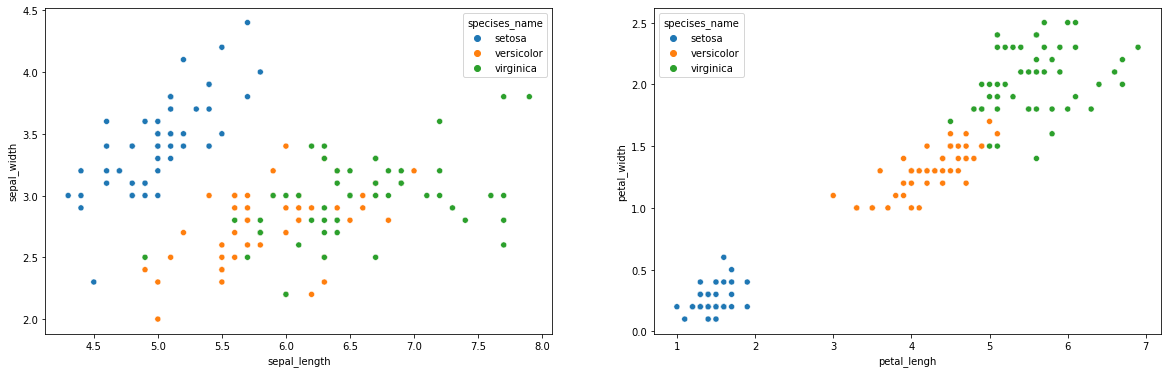

In [9]:
_, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='specises_name', ax=ax[0])
sns.scatterplot(data=iris, x='petal_lengh', y='petal_width', hue='specises_name', ax=ax[1])

plt.show()

### Sampling

In [26]:
iris.shape

(150, 6)

In [25]:
sampled_iris = iris.sample(n=50)
sampled_iris.shape

(50, 6)

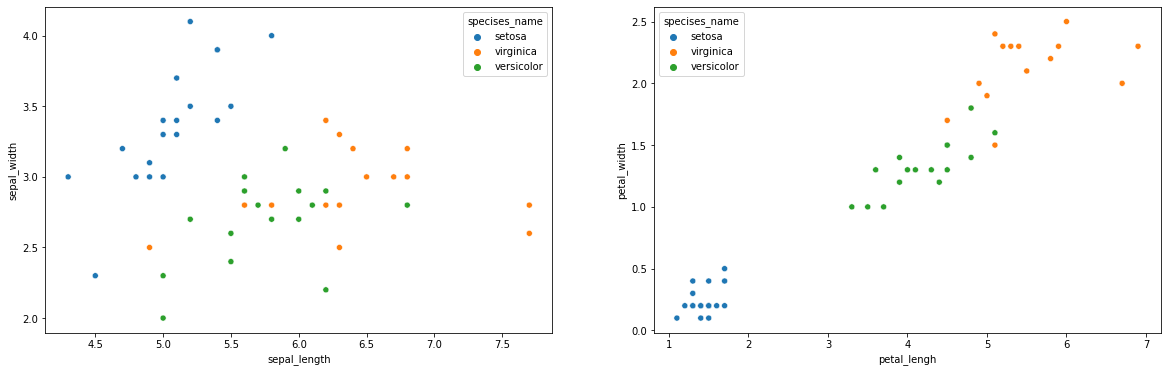

In [27]:
_, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=sampled_iris, x='sepal_length', y='sepal_width', hue='specises_name', ax=ax[0])
sns.scatterplot(data=sampled_iris, x='petal_lengh', y='petal_width', hue='specises_name', ax=ax[1])

plt.show()

/opt/anaconda3/envs/MCI_PYTHON_34A8_L2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


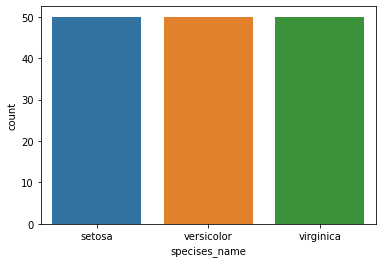

In [18]:
sns.countplot(iris.specises_name);

In [14]:
iris.isna().sum()

sepal_length     0
sepal_width      0
petal_lengh      0
petal_width      0
species          0
specises_name    0
dtype: int64

In [23]:
iris.shape

(150, 6)

### Prepare data

In [72]:
X = StandardScaler().fit_transform(iris[['sepal_length', 'sepal_width', 'petal_lengh', 'petal_width']])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, iris.species, test_size=0.1, shuffle=True, random_state=4)

### MODEL

In [84]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(32, activation='relu'))
model.add(Dense(3))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, epochs=10, validation_split=0.1)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_53 (Dense)             (None, 3)                 99        
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 0s 43ms/step - loss: 2.8667 - accuracy: 0.3223 - val_loss: 1.6733 - val_accuracy: 0.6429
Epoch 2/10
4/4 [==============================] - 0s 8ms/step - loss: 2.2633 - accuracy: 0.3223 - val_loss: 1.6388 - val_accuracy: 0.6429
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 2.1241 - accuracy: 0.3802 - val_loss: 1.6132 - val_accuracy: 0.7143
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 2.0078 - accuracy: 0.3802 - val_

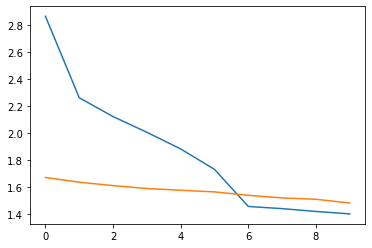

In [85]:
plt.plot(history.history.get('loss'), label='training loss')
plt.plot(history.history.get('val_loss'), label='valid loss');

In [86]:
model.predict(X_test)

array([[-0.72838837,  0.3440365 ,  0.35441977],
       [-0.80506945, -1.1932268 , -0.61659706],
       [-1.051533  ,  0.11078808,  0.3123946 ],
       [-1.2612194 ,  0.10483168,  0.5561863 ],
       [-1.111801  ,  0.09902993,  0.4323365 ],
       [-0.32687938,  0.1629565 ,  0.10322696],
       [-0.49174255,  0.30062872,  0.22442538],
       [-0.96907806, -1.4715511 , -0.7262603 ],
       [-0.82791233, -1.1208394 , -0.64528835],
       [-0.572826  ,  0.17023669,  0.17186284],
       [-0.25296178, -0.12249868, -0.36405465],
       [-0.56767374, -0.5328317 , -0.46436653],
       [-0.25234443, -0.10036432, -0.38372192],
       [-0.40973362,  0.13638528,  0.12601556],
       [-0.31267324,  0.369708  ,  0.3164645 ]], dtype=float32)

### Batch size

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_49 (Dense)             (None, 3)                 99        
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 4.5810 - accuracy: 0.5333
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 3.6615 - accuracy: 0.6148
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 3.1016 - accuracy: 0.6519
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 2.9621 - accuracy: 0.6593
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 2.9017 - accuracy: 0.6667
Epoch 6/10
3/3 [=====================

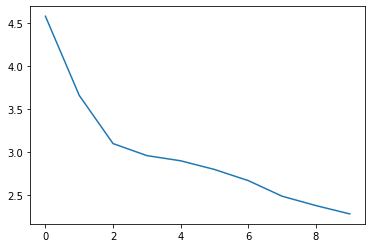

In [80]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(32, activation='relu'))
model.add(Dense(3))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, epochs=10, batch_size=50)

plt.plot(history.history.get('loss'), label='training loss');

### MNIST

In [87]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [89]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 2s 0us/step


In [91]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2963 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1434 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1071 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0875 - accuracy: 0.9729
Epoch 5/5
313/313 [==============================] - 0s 766us/step - loss: 0.0706 - accuracy: 0.9781


[0.07055709511041641, 0.9781000018119812]

In [93]:
predicted = model.predict(x_train)

In [96]:
predicted[0, :]

array([1.8808165e-11, 9.4209867e-09, 5.4673844e-08, 1.3441612e-03,
       2.3503700e-17, 9.9865580e-01, 6.8599179e-14, 2.2560146e-08,
       1.5256551e-11, 1.1849244e-08], dtype=float32)